In [1]:
import numpy as np

__1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.__  

In [2]:
def calc_logloss(y, y_pred):
    np.where(y_pred == 1, y_pred-0.00001, y_pred )
    np.where(y_pred == 0, y_pred+0.00001, y_pred )
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

__2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.__

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

X, y

(array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
         1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
        [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
         5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
        [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
         1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
        [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
         3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.T, y)
W_lr = model.predict(X.T)
W_lr, model.coef_

(array([0.2617132 , 0.17509907, 1.02794228, 0.21840613, 0.53795688,
        0.31862798, 1.20396413, 0.05324898, 0.28336673, 0.91967463]),
 array([ 0.00000000e+00, -1.86835968e-01, -4.33070617e-04,  1.06133271e+00]))

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        if err <= 1e-3:
            print(i, W, err)
            break
    return W

In [8]:

W = eval_model(X_st, y, iterations=2000, alpha=8.827595e-2)
# если  alfa увеличивается ошибка уменьшается но при этом появляются ошибки 
# <ipython-input-51-116ebb789760>:4: RuntimeWarning: divide by zero encountered in log
#   err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
# <ipython-input-51-116ebb789760>:4: RuntimeWarning: invalid value encountered in multiply
#   err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

200 [-0.5657761  -0.79736542  1.11268701  1.65387362] 0.5044774584075642
400 [-1.11653944 -0.90037858  1.07997519  2.1370022 ] 0.4731504151986763
600 [-1.61894132 -0.95054726  0.96496563  2.5113469 ] 0.44994883148850046
800 [-2.08066402 -0.97592237  0.81958001  2.82440332] 0.4310563912808562
1000 [-2.50643968 -0.98974881  0.6666699   3.09973522] 0.4151396733310559
1200 [-2.90025069 -0.99848819  0.51676222  3.34972913] 0.4015240917125794
1400 [-3.26564937 -1.00531191  0.37442305  3.58128619] 0.38976323748312114
1600 [-3.60583907 -1.01173068  0.24125179  3.79847286] 0.3795206955260782
1800 [-3.9236924  -1.01841158  0.11739615  4.00384212] 0.37053064769182964
2000 [-4.22176172e+00 -1.02560072e+00  2.33734521e-03  4.19911588e+00] 0.3625798842559626


__3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).__

In [9]:
def calc_pred_proba(W, X):
    y_pred_prob = sigmoid(np.dot(W, X))
    return y_pred_prob

In [10]:
# Функция eval_model не работает! при подборе альфа и вызове calc_pred_proba полчаем либо массив 
# с вероятностью все 0, при alpha >= 1e-1, 
# либо все 1, при alpha < 1e-2,    
y_pred_prob = calc_pred_proba(W, X)
y_model_pred = calc_pred_proba(model.coef_, X)
y_pred_prob, y_model_pred 

(array([0.53007018, 0.64288204, 0.97973283, 0.58762614, 0.98889089,
        0.86380158, 0.99883469, 0.94236535, 0.5008897 , 0.98859929]),
 array([0.6588023 , 0.639074  , 0.80599452, 0.64900179, 0.71792763,
        0.67147773, 0.83204806, 0.61051969, 0.66365276, 0.78850258]))

__4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).__

In [11]:
def calc_pred_bin(W, X):
    y_pred_prob = sigmoid(np.dot(W, X))
    y_pred_prob = np.where(y_pred_prob < 0.75, 0, 1 )
    return y_pred_prob

In [12]:
y_pred_bin = calc_pred_bin(W, X)
y_model_bin = calc_pred_bin(model.coef_, X)
y_pred_bin, y_model_bin, y

#y_pred_bin = y_model_bin

(array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1]),
 array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

__5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.__

In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

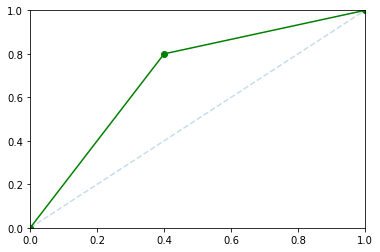

In [14]:
fpr, tpr, _ = roc_curve(y, y_pred_bin)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [15]:
roc_auc_score(y, y_pred_bin)

0.7000000000000001

In [16]:
accuracy = 1.0 - np.mean(np.abs(y_pred_bin - y))
accuracy

0.7

In [19]:
tr = np.where(y < 0.5, 0, 1 )
pred = np.where(y_pred_bin < 0.5, 0, 1 )

conf_matrix = np.zeros((2,2), dtype=np.uint8)
conf_matrix[0][0] = np.sum(list(map(all, zip(tr, pred))))    # TP 
conf_matrix[0][1] = np.sum(list(map(lambda x: ~x[0]&x[1], zip(tr, pred))))    # FP real 0 predict 1
conf_matrix[1][0] = np.sum(list(map(lambda x: x[0]&~x[1] , zip(tr, pred))))    # FN real 1 predict 0
conf_matrix[1][1] = np.sum(list(map(lambda x: 0x01&(~x[0]&~x[1]) , zip(tr, pred))))    # TN

accur = (conf_matrix[0][0] + conf_matrix[1][1])/len(y)
prec = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
rec = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0]) 
f1 = (2 * prec * rec)/(prec + rec)


print( f'conf_matrix: \n{conf_matrix},\naccuracy: {round(accur,3)},\
\tprecision: {round(prec,3)},\trecall: {round(rec,3)},\tF1_score: {round(f1,3)}')

conf_matrix: 
[[4 2]
 [1 3]],
accuracy: 0.7,	precision: 0.6669999957084656,	recall: 0.800000011920929,	F1_score: 0.727


__6. Могла ли модель переобучиться? Почему?__

Модель по сравнению с библиотечной имеет худшие показатели, следовательно не обучена. при переобучении мы получаем 100% ответов. Достаточно сложно говорить о качестве обучения модели, потому что при небольшом изменении альфа получаем в выходном векторе либо все 0 либо все 1...  

__7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.__

In [24]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [25]:

W = eval_model_l1(X_st, y, iterations=2000, alpha=8.827595e-2)
W

200 [-1.11641294 -0.90046461  1.08015573  2.13708777] 0.47328369250899505
400 [-2.08015898 -0.97569949  0.81935093  2.82376672] 0.4311641173460858
600 [-2.8993509  -0.99811207  0.51642781  3.3486003 ] 0.4016192445060276
800 [-3.60452728 -1.01128126  0.24097052  3.79696305] 0.3796091461089596
1000 [-4.22002593e+00 -1.02510858e+00  2.17291857e-03  4.19726104e+00] 0.36266495948063604
1200 [-4.76469189 -1.04130657 -0.20383471  4.56199761] 0.34923398169516057
1400 [-5.25376913 -1.05906973 -0.3847597   4.89804821] 0.33828372110979443
1600 [-5.69852969 -1.07787637 -0.54579283  5.21057423] 0.3291363652981873
1800 [-6.10749176 -1.09728704 -0.69109117  5.50348697] 0.32133171453231835
2000 [-6.48717373 -1.11699042 -0.82380621  5.77985792] 0.3145500866209089


array([-6.48717373, -1.11699042, -0.82380621,  5.77985792])

In [26]:
W = eval_model_l2(X_st, y, iterations=2000, alpha=8.827595e-2)
W

200 [-0.56524711 -0.79649452  1.11135146  1.65216214] 0.5045595558507354
400 [-1.11453049 -0.89886387  1.0780671   2.13338198] 0.4732923385079594
600 [-1.61465829 -0.94856534  0.96316042  2.50561579] 0.45016549990903715
800 [-2.07342614 -0.97360646  0.81842379  2.81635161] 0.4313636541138943
1000 [-2.49566721 -0.98718533  0.66658296  3.08912906] 0.4155475414223389
1200 [-2.88544755 -0.99572263  0.51805546  3.33631184] 0.40203701150191556
1400 [-3.24638593 -1.00235838  0.37732205  3.56478589] 0.3903818676040454
1600 [-3.58173674 -1.00858147  0.24592077  3.77861075] 0.3802435655316688
1800 [-3.89441094 -1.01504507  0.12395775  3.98033901] 0.3713553235310847
2000 [-4.18698923 -1.02198717  0.01088737  4.17169647] 0.36350367775064246


array([-4.18698923, -1.02198717,  0.01088737,  4.17169647])